<a href="https://colab.research.google.com/github/MaksymZymyn1989/Data-Analytics/blob/main/Project_coffee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import requests
import matplotlib.pyplot as plt
import seaborn as sns

1. Завантажте набір даних рейтингу кави.

In [ ]:
def download_document(file_name, document_url):
   if os.path.exists(file_name):
       return pd.read_csv(file_name, sep = ',')
   else:
       response = requests.get(document_url)
       if response.status_code == 200:
           #with open(file_name, 'wb') as f:
              #f.write(response.content)
           return pd.read_table(filepath_or_buffer = document_url, sep = ',')
       else:
           print(f'Failed to download the document. Status code: {response.status_code}')

In [ ]:
file_name = '/content/coffee_ratings.csv'
document_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-07/coffee_ratings.csv'

In [ ]:
coffee = download_document(file_name, document_url)
coffee.head()

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [ ]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_cup_points       1339 non-null   float64
 1   species                1339 non-null   object 
 2   owner                  1332 non-null   object 
 3   country_of_origin      1338 non-null   object 
 4   farm_name              980 non-null    object 
 5   lot_number             276 non-null    object 
 6   mill                   1021 non-null   object 
 7   ico_number             1180 non-null   object 
 8   company                1130 non-null   object 
 9   altitude               1113 non-null   object 
 10  region                 1280 non-null   object 
 11  producer               1107 non-null   object 
 12  number_of_bags         1339 non-null   int64  
 13  bag_weight             1339 non-null   object 
 14  in_country_partner     1339 non-null   object 
 15  harv

1. Які країни є великими експортерами кави?

In [ ]:
coffee.bag_weight.unique()

array(['60 kg', '1', '30 kg', '69 kg', '1 kg', '2 kg,lbs', '6', '3 lbs',
       '50 kg', '2 lbs', '100 lbs', '15 kg', '2 kg', '2', '70 kg',
       '19200 kg', '5 lbs', '1 kg,lbs', '6 kg', '0 lbs', '46 kg', '40 kg',
       '20 kg', '34 kg', '1 lbs', '660 kg', '18975 kg', '12000 kg',
       '35 kg', '66 kg', '80 kg', '132 lbs', '5 kg', '25 kg', '59 kg',
       '18000 kg', '150 lbs', '9000 kg', '18 kg', '10 kg', '29 kg',
       '1218 kg', '4 lbs', '0 kg', '13800 kg', '1500 kg', '24 kg',
       '80 lbs', '8 kg', '3 kg', '350 kg', '67 kg', '4 kg', '55 lbs',
       '100 kg', '130 lbs'], dtype=object)

Оскільки вага кожного мішка кавових зерен відрізняється, а, крім того, використовуються різні одиниці вимірювання, вважаю за необхідне звести обсяги екпорту до єдиного показника - кілограм (в даному випадку тон).

In [ ]:
def weight_lbs_to_kg(weight):
  if not weight:
        return None

  try:
    weight_elements = weight.split()

    if len(weight_elements) == 2:
      value, unit = weight_elements
      value = float(value)

      if unit.lower() in ('kg', 'kg,lbs'):
        return value
      elif unit.lower() == 'lbs':
        return value * 0.45359237
      else:
        raise ValueError(f'Unknown unit: {unit}')

    elif len(weight_elements) == 1:
      value = float(weight_elements[0])
      return value

    else:
      return None

  except Exception as e:
    print(f'Error: {e}')
    return None

In [ ]:
coffee['bag_weight_kg'] = coffee['bag_weight'].apply(weight_lbs_to_kg)

In [ ]:
coffee['export_ton'] = ((coffee['number_of_bags'] * coffee['bag_weight_kg'])/1000).astype(float)

In [ ]:
top_10_counties_by_export = coffee.groupby('country_of_origin').agg(export_ton = ('export_ton', 'sum')).sort_values(by='export_ton', ascending = False).head(10)
top_10_counties_by_export

,export_ton
country_of_origin,
Costa Rica,16005.554531
Ethiopia,12707.999874
Kenya,9319.251000
Honduras,5638.874000
Uganda,4080.780000
Peru,2790.186584
Colombia,2568.920263
Guatemala,2115.714997
Brazil,1303.164536


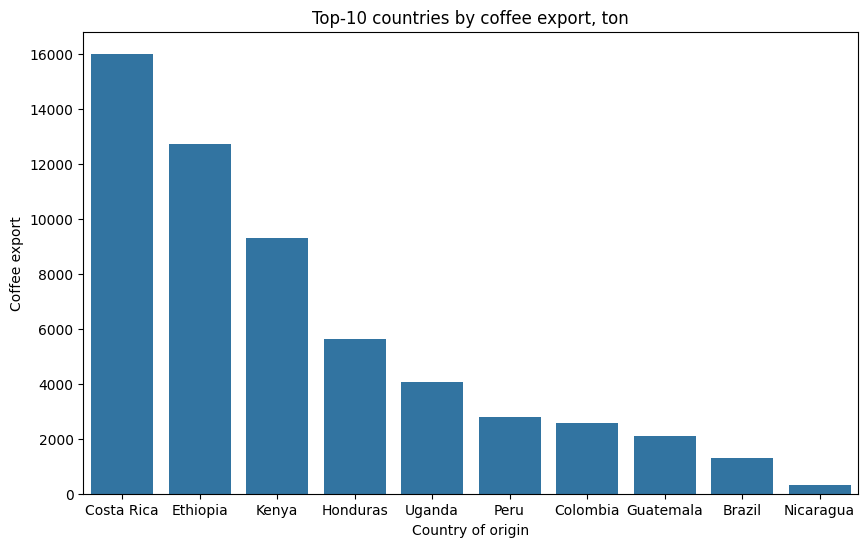

In [ ]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'country_of_origin', y = 'export_ton', data = top_10_counties_by_export)
plt.title('Top-10 countries by coffee export, ton')
plt.xlabel('Country of origin')
plt.ylabel('Coffee export')
plt.show()

ТОП-3 найбільних країн-експортерів кави - це Коста-Ріка, Ефіопія та Кенія. Сумарно вони експортували більше 38 тисяч тонн кавових зерен. До ТОП-10 країн - екпортерів кави також входять Гондурас, Уганда, Перу, Колумбія, Гватемала, Бразилія та Нікарагуа.

Графік з ТОП-10 країн дає можливість відповісти на питання, але не дає змоги зрозуміти частку цих країн у загальному обсязі екпорту кави.

In [ ]:
counties_by_export = top_10_counties_by_export.head(9)
counties_by_export.loc['Other_countries'] = [coffee.export_ton.sum() - top_10_counties_by_export[:9].export_ton.sum()]
counties_by_export

,export_ton
country_of_origin,
Costa Rica,16005.554531
Ethiopia,12707.999874
Kenya,9319.251000
Honduras,5638.874000
Uganda,4080.780000
Peru,2790.186584
Colombia,2568.920263
Guatemala,2115.714997
Brazil,1303.164536


In [ ]:
print(f'Total coffee export: {round(counties_by_export.export_ton.sum())} ton')
print(f'TOP-10 counries coffee export: {round(top_10_counties_by_export.export_ton.sum())} ton or {round((top_10_counties_by_export.export_ton.sum() / counties_by_export.export_ton.sum()) * 100, 2)}%')

Total coffee export: 57753 ton
TOP-10 counries coffee export: 56857 ton or 98.45%


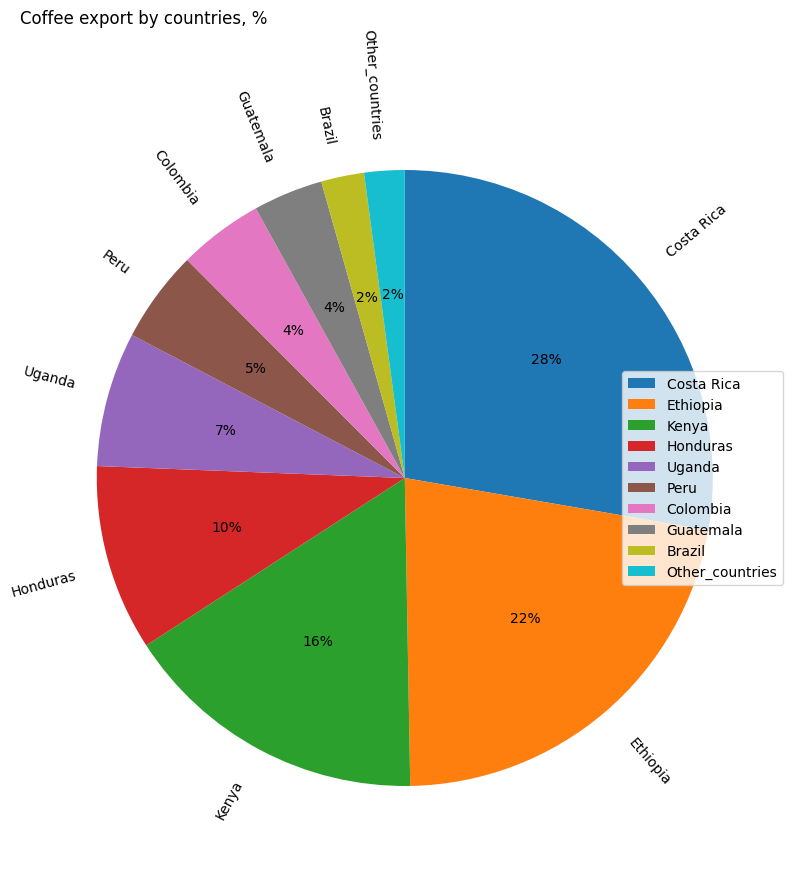

In [ ]:
plt.figure(figsize = (10, 10))
plt.pie(counties_by_export['export_ton'], labels = counties_by_export.index, startangle = 90, counterclock = False, rotatelabels = True, autopct='%1.0f%%')
plt.title('Coffee export by countries, %', loc = 'left', y = 1.08)
plt.legend(loc = 'center right')
plt.show()

На круговій діаграмі не рекомендується малювати більше 10 значень, тому для її побудови використаємо ТОП-9 країн за обсягами експорту, а решту згрупуємо в категорію "Інші".
Цей графік дає можливість не лише визначити найбільших екпортерів кави, але і зрозуміти, що ТОП-9 країн покривають 98% від загального обсягу екпорту цієї продукції.

2. Які кореляції між різними показниками оцінки кави?

In [ ]:
coffee_quality = coffee[['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points']]
coffee_quality

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points
0,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58
1,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92
2,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75
3,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00
4,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83
...,...,...,...,...,...,...,...,...,...,...,...
1334,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75
1335,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08
1336,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17
1337,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,75.08


In [ ]:
correlation_matrix = coffee_quality.corr(method = 'pearson')
correlation_matrix

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points
aroma,1.000000,0.813259,0.777056,0.723582,0.673006,0.708634,0.366578,0.335684,0.253493,0.687288,0.791627
flavor,0.813259,1.000000,0.895672,0.816688,0.735720,0.792290,0.410923,0.396958,0.291065,0.793197,0.874279
aftertaste,0.777056,0.895672,1.000000,0.792255,0.734306,0.809639,0.401456,0.386665,0.266409,0.785123,0.860656
acidity,0.723582,0.816688,0.792255,1.000000,0.706435,0.733017,0.375383,0.300927,0.261854,0.698151,0.797024
body,0.673006,0.735720,0.734306,0.706435,1.000000,0.757597,0.326879,0.276587,0.268342,0.633208,0.757165
balance,0.708634,0.792290,0.809639,0.733017,0.757597,1.000000,0.400915,0.370341,0.283272,0.721132,0.828502
uniformity,0.366578,0.410923,0.401456,0.375383,0.326879,0.400915,1.000000,0.526219,0.451083,0.359620,0.656454
clean_cup,0.335684,0.396958,0.386665,0.300927,0.276587,0.370341,0.526219,1.000000,0.440644,0.356995,0.658859
sweetness,0.253493,0.291065,0.266409,0.261854,0.268342,0.283272,0.451083,0.440644,1.000000,0.216273,0.554029
cupper_points,0.687288,0.793197,0.785123,0.698151,0.633208,0.721132,0.359620,0.356995,0.216273,1.000000,0.790217


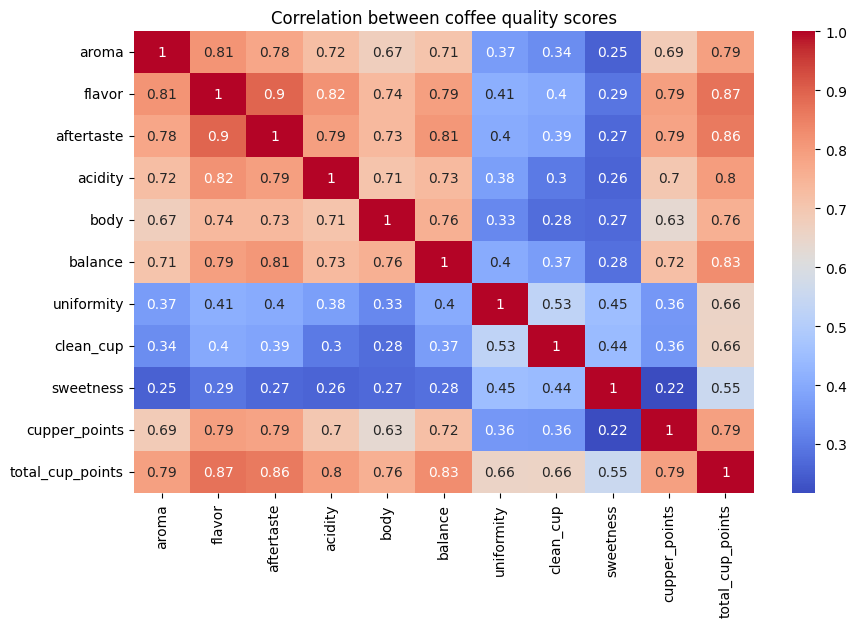

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation between coffee quality scores')
plt.show()

Показники "uniformity", "clean_cup" та	"sweetness" мають значення кореляції з іншими показниками (крім "total_cup_points") менше 0.6, що свідчить про слабку кореляцію. І, відповідно, вони ж найменше впливають на результуючий показник "total_cup_points", який найбільше залежить від оцінок за категоріями "flavor", "aftertaste" та "balance".

In [ ]:
cleaned_correlation_matrix = coffee[['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'cupper_points', 'total_cup_points']].corr(method='pearson')
cleaned_correlation_matrix

,aroma,flavor,aftertaste,acidity,body,balance,cupper_points,total_cup_points
aroma,1.000000,0.813259,0.777056,0.723582,0.673006,0.708634,0.687288,0.791627
flavor,0.813259,1.000000,0.895672,0.816688,0.735720,0.792290,0.793197,0.874279
aftertaste,0.777056,0.895672,1.000000,0.792255,0.734306,0.809639,0.785123,0.860656
acidity,0.723582,0.816688,0.792255,1.000000,0.706435,0.733017,0.698151,0.797024
body,0.673006,0.735720,0.734306,0.706435,1.000000,0.757597,0.633208,0.757165
balance,0.708634,0.792290,0.809639,0.733017,0.757597,1.000000,0.721132,0.828502
cupper_points,0.687288,0.793197,0.785123,0.698151,0.633208,0.721132,1.000000,0.790217
total_cup_points,0.791627,0.874279,0.860656,0.797024,0.757165,0.828502,0.790217,1.000000


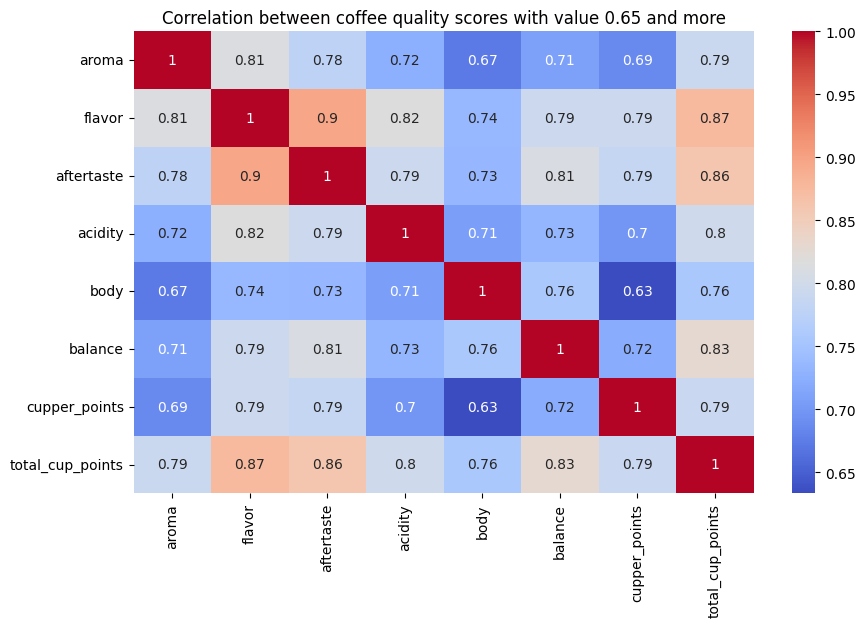

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cleaned_correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation between coffee quality scores with value 0.65 and more')
plt.show()

На результуючий показник оцінки якості кави найбільше впливають оцінки за параметрами "aftertaste", "flavor" та "balance". Менший, але все ж значний вплив мають оцінки за категоріями "acidity", "aroma", "cupper_points" та "body".

Без врахування результуючого показника найвищий рівень кореляції між "flavor" та "aftertaste", а найменший - між "body" та "cupper_points".

3. Який (якщо є) вплив кольору зерен на загальний сорт кави?

In [ ]:
color_impact_on_quality = coffee.groupby(['species', 'color']).agg(avg_total_cup_points = ('total_cup_points', 'mean')).sort_values(by = ['species', 'color'])
color_impact_on_quality = color_impact_on_quality.reset_index()

In [ ]:
color_impact_on_quality

,species,color,avg_total_cup_points
0,Arabica,Blue-Green,82.706585
1,Arabica,Bluish-Green,82.652411
2,Arabica,Green,81.898118
3,Robusta,Blue-Green,79.360000
4,Robusta,Bluish-Green,81.335000
5,Robusta,Green,81.458000


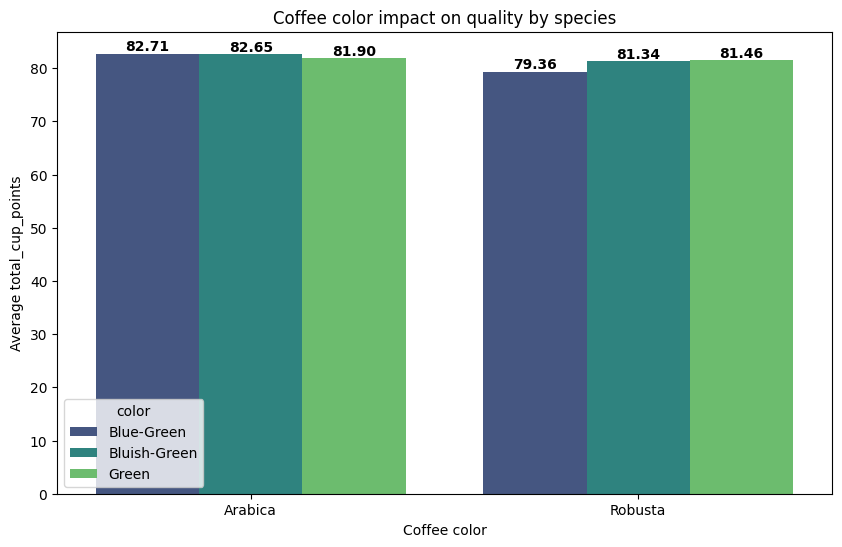

In [ ]:
plt.figure(figsize = (10, 6))
plot = sns.barplot(data = color_impact_on_quality, x = 'species', y = 'avg_total_cup_points', hue = 'color', palette='viridis')
for p in plot.patches:
  if p.get_height() > 0:
    plot.annotate(format(p.get_height(), '.2f'),  (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', fontsize = 10, color = 'black', fontweight = 'bold')
plt.xlabel('Coffee color')
plt.ylabel('Average total_cup_points')
plt.title('Coffee color impact on quality by species')
plt.legend(title='color')
plt.show()

Для арабіки найкраще середнє значення оцінки якості кави характерно для зерен синьо-зеленого (Blue-Green) кольору і середня оцінка менша для блакитнувато-зеленого (Bluish-Green) та найнижча для зеленого (Green) кольору зерен. Тобто чим зеленіший колір зерен, тим нижча середня оцінка якості арабіки.

Для робусти ситуація прямо протилежна. Найнижча середня оцінка робусти для зерен синьо-зеленого кольору (Blue-Green), а найвища для зерен зеленого (Green) кольору. Тобто чим зеленіший колір зерен, тим вища середня оцінка якості кави робусти.

4. Чи впливає країна походження на якість кави?

In [ ]:
country_impact_on_quality = coffee.groupby('country_of_origin').agg(avg_total_cup_points = ('total_cup_points', 'mean')).sort_values(by = 'avg_total_cup_points', ascending = False)
country_impact_on_quality

,avg_total_cup_points
country_of_origin,
Papua New Guinea,85.750000
Ethiopia,85.484091
Japan,84.670000
United States,84.433000
Kenya,84.309600
Panama,83.707500
Uganda,83.451944
Colombia,83.106557
El Salvador,83.052857


In [ ]:
from matplotlib.colors import TwoSlopeNorm

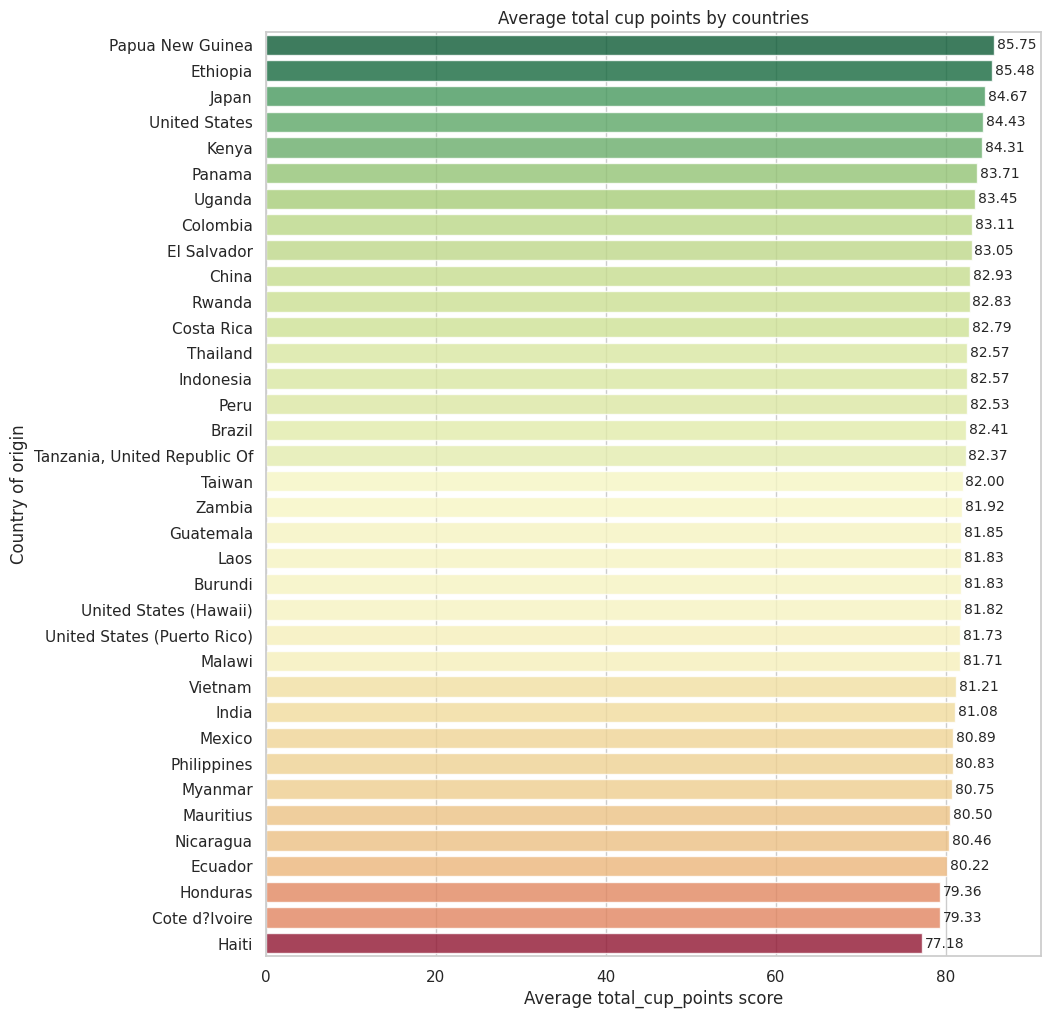

In [ ]:
sns.set(style = 'whitegrid', color_codes = True)
N = len(country_impact_on_quality)

norm = TwoSlopeNorm(vmin = country_impact_on_quality.avg_total_cup_points.min(), vcenter = country_impact_on_quality.avg_total_cup_points.median(), vmax = country_impact_on_quality.avg_total_cup_points.max())
colors = [plt.cm.RdYlGn(norm(c)) for c in country_impact_on_quality['avg_total_cup_points']]

plt.figure(figsize = (10, 12))
plot = sns.barplot(x = 'avg_total_cup_points', y = 'country_of_origin', hue = 'country_of_origin', data = country_impact_on_quality, alpha = 0.8, palette = colors)
for i in plot.containers:
  plot.bar_label(i, fontsize=10, fmt='%.2f', padding = 2)
plt.title('Average total cup points by countries')
plt.xlabel('Average total_cup_points score')
plt.xlim(0, country_impact_on_quality.avg_total_cup_points.max() + 5.5)
plt.ylabel('Country of origin')
plt.show()

In [ ]:
coffee_country_score = coffee[['country_of_origin', 'total_cup_points']].dropna()
coffee_country_score['country_of_origin_num'], _ = pd.factorize(coffee_country_score['country_of_origin'])
coffee_country_score

,country_of_origin,total_cup_points,country_of_origin_num
0,Ethiopia,90.58,0
1,Ethiopia,89.92,0
2,Guatemala,89.75,1
3,Ethiopia,89.00,0
4,Ethiopia,88.83,0
...,...,...,...
1334,Ecuador,78.75,22
1335,Ecuador,78.08,22
1336,United States,77.17,4
1337,India,75.08,35


In [ ]:
country_quality_correlation = coffee_country_score[['country_of_origin_num', 'total_cup_points']].corr(method = 'spearman')
country_quality_correlation

,country_of_origin_num,total_cup_points
country_of_origin_num,1.000000,-0.013928
total_cup_points,-0.013928,1.000000


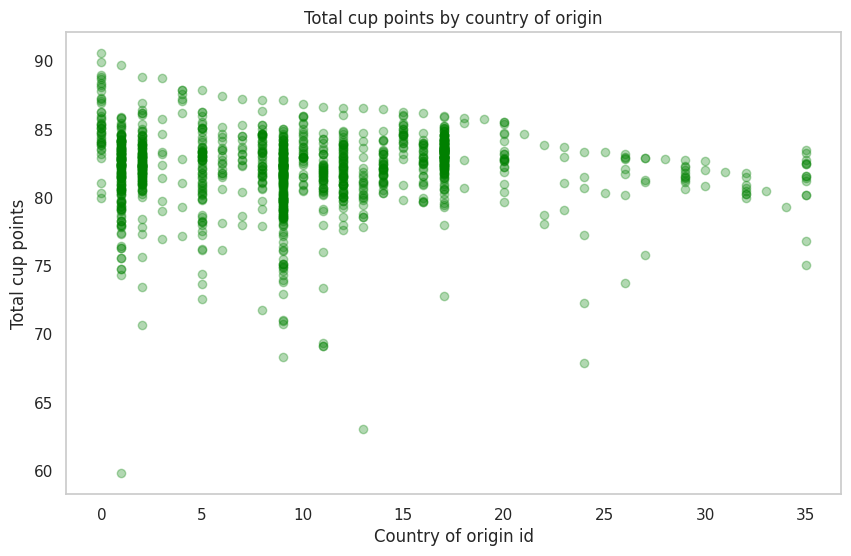

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(x = 'country_of_origin_num', y = 'total_cup_points', data = coffee_country_score[coffee_country_score['total_cup_points'] > 0], alpha = 0.3, color = 'green')
plt.title('Total cup points by country of origin')
plt.xlabel('Country of origin id')
plt.ylabel('Total cup points')
plt.grid(None)
plt.show()

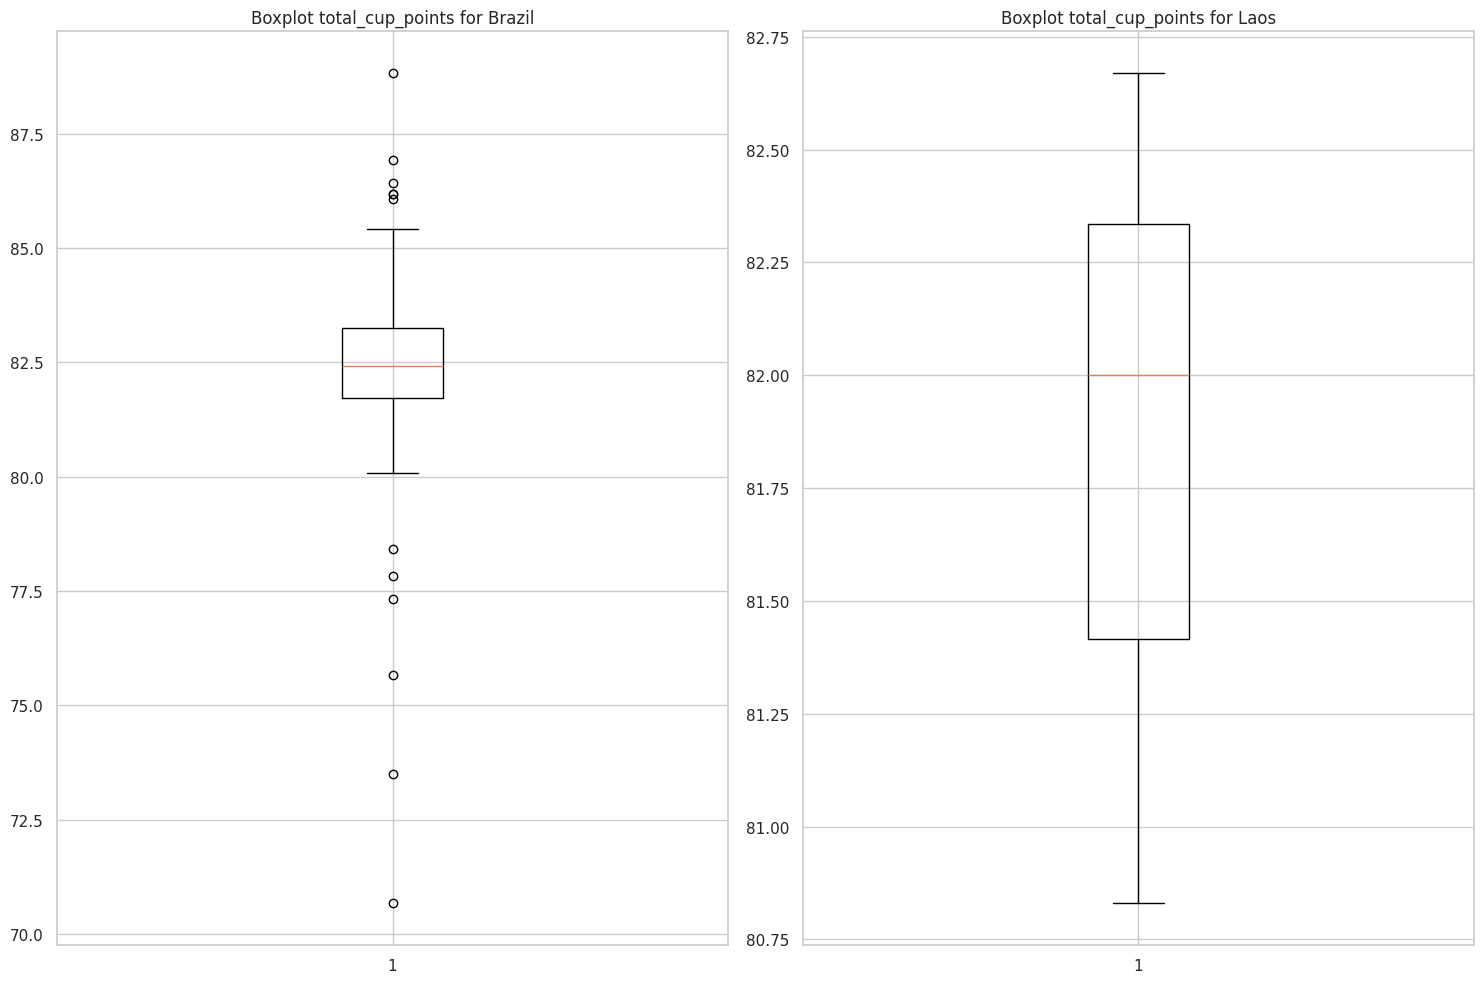

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplot(1,2,1)
plt.boxplot(x = coffee_country_score[coffee_country_score['country_of_origin'] == 'Brazil'][['total_cup_points']])
plt.title(f'Boxplot total_cup_points for Brazil')

plt.subplot(1,2,2)
plt.boxplot(x = coffee_country_score[coffee_country_score['country_of_origin'] == 'Laos'][['total_cup_points']])
plt.title(f'Boxplot total_cup_points for Laos')

plt.tight_layout()
plt.show()

З огляду на середні значення оцінок якості кави по країнах, найкращі показники мають Папуа Нова Гвінея (Океанія), Ефіопія (Африка) та Японія (Азія), а найнижчі Гондурас (Північна Америка), Кот-д'Івуар (Африка) та Гаїті (Карибський басейн).

Коефіцієн кореляції Спірмена = (-0.013928), що свідчить про практично відсутній зв'язок між країною походження та оцінкою якості кави.
Графік розсіювання також демонсрує це: для однієї і тієж країни може бути значний розмах в показниках якості кави. На прикладі Бразилії та Лаоса, середні показники якості кави для яких складають 82.41 та 81.83 відповідно, бачимо, що оцінка якості кави для Бразилії коливається від 70.67 до 88.83, а для Лаоса - від 80.83 до 82.67. Тобто в Бразилії є кава і з гіршою якістю, проте в рейтингу країн за середніми оцінками Бразилія знаходиться вище за Лаос.

5. Чи суттєво впливає висота на якість кави?

In [ ]:
coffee[['total_cup_points', 'country_of_origin', 'altitude', 'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters']].sort_values(by='country_of_origin')

,total_cup_points,country_of_origin,altitude,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1075,80.50,Brazil,1250,1250.0,1250.0,1250.0
730,82.33,Brazil,1100m,1100.0,1100.0,1100.0
483,83.08,Brazil,NaN,NaN,NaN,NaN
987,81.08,Brazil,695,695.0,695.0,695.0
484,83.08,Brazil,1200,1200.0,1200.0,1200.0
...,...,...,...,...,...,...
554,82.92,Vietnam,1040m,1040.0,1040.0,1040.0
564,82.83,Vietnam,1040,1040.0,1040.0,1040.0
444,83.17,Vietnam,1550,1550.0,1550.0,1550.0
823,81.92,Zambia,1000-1500m,1000.0,1500.0,1250.0


In [ ]:
coffee[['country_of_origin', 'altitude_mean_meters']].dropna().drop_duplicates().sort_values(by = 'altitude_mean_meters')

,country_of_origin,altitude_mean_meters
279,Brazil,1.0
100,Kenya,1.0
1203,Mexico,12.0
41,Brazil,12.0
785,Costa Rica,13.0
...,...,...
840,Myanmar,4001.0
1098,Myanmar,4287.0
543,Brazil,11000.0
1040,Nicaragua,110000.0


Google каже, що оптимальний рівень для вирощування арабіки від 800 до 2000 метрів над рівнем моря, а робусти 600 - 1000, проте залежно від рівня вирощування зерез їх розідляються на різні класи: Low Elevation (0 - 2 000 feet = 0 - 609 м), Medium Elevation (2 000 - 4 000 feet = 610 - 1219 м), High Elevation (4 000 - 6 000 feet = 1220 - 1 829 м) та Very High Elevation (6 000+ feet = 1830 + ).
З огляду на це значення висоти більше 2500 метрів видаються помилковими.


[link](https://thecoffeeclubshop.com/blogs/barista-blog/the-best-countries-to-grow-coffee-and-how-altitudes-affect-flavor-profiles?srsltid=AfmBOoonzMkKz1M9INftnN9NBuYB4eBlj4uKBiVFzuP94X2gAttQzqmu)

[link 2](https://iburucoffee.com/blogs/blog/high-altitude-coffee-countries)

In [ ]:
coffee_altitude_quality = coffee[(coffee['altitude_mean_meters'] > 0) & (coffee['altitude_mean_meters'] < 2500)][['total_cup_points', 'altitude_mean_meters']].dropna()
coffee_altitude_quality

,total_cup_points,altitude_mean_meters
0,90.58,2075.0
1,89.92,2075.0
2,89.75,1700.0
3,89.00,2000.0
4,88.83,2075.0
...,...,...
1330,80.50,1200.0
1331,80.17,750.0
1332,80.17,750.0
1335,78.08,40.0


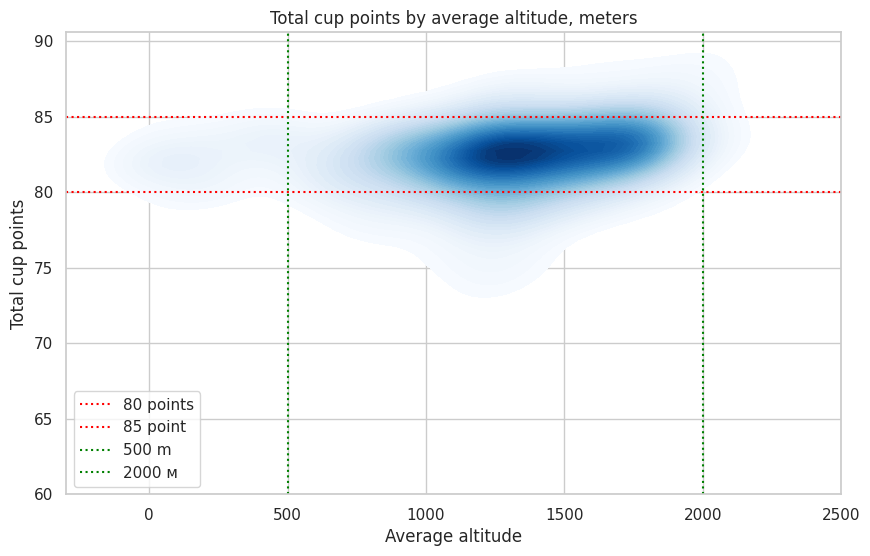

In [ ]:
plt.figure(figsize = (10, 6))
sns.kdeplot(data = coffee_altitude_quality, x = 'altitude_mean_meters', y = 'total_cup_points', fill=True, cmap = 'Blues', levels = 50)
plt.axhline(80, color = 'red', linestyle = ':', label = '80 points')
plt.axhline(85, color = 'red', linestyle = ':', label = '85 point')
plt.axvline(500, color = 'green', linestyle = ':', label = '500 m')
plt.axvline(2000, color = 'green', linestyle = ':', label = '2000 м')
plt.xlim(-300, 2500)
plt.ylim(60, coffee_altitude_quality['total_cup_points'].max())
plt.title('Total cup points by average altitude, meters')
plt.xlabel('Average altitude')
plt.ylabel('Total cup points')
plt.legend()
plt.show()

Так, висота має вплив на якість кави. Найчастіше високі (80-85 балів) оцінки якості кави мають зерна, що вирощені в середньому на висоті від 800 до 1800 метрів.